In [1]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from data_loader import Nutrition5KDataset

In [2]:
# Define a simple transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
data_path = '/Users/liwuchen/Documents/nutrition5k_dataset'
# Create dataset instances
train_dataset = Nutrition5KDataset(root_dir=data_path, 
                                 split='train', 
                                 transform=transform)
val_dataset = Nutrition5KDataset(root_dir=data_path, 
                               split='val', 
                               transform=transform)
test_dataset = Nutrition5KDataset(root_dir=data_path, 
                                split='test', 
                                transform=transform)

# Print dataset sizes
print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Train samples: 1278
Val samples: 319
Test samples: 400


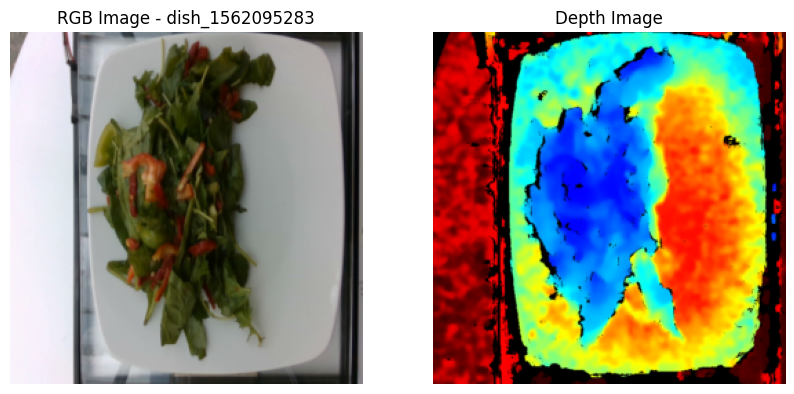


Nutritional values:
Mass: 197.00g
Fat: 19.75g
Carbs: 11.77g
Protein: 5.27g


In [3]:
# Create a dataloader and visualize a sample
dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
batch = next(iter(dataloader))

# Visualize the first sample in the batch
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# RGB image (permute to HWC for matplotlib)
rgb_image = batch['rgb_image'][0].permute(1, 2, 0)
ax1.imshow(rgb_image)
ax1.set_title(f"RGB Image - {batch['dish_id'][0]}")
ax1.axis('off')

# Depth image
depth_image = batch['depth_image'][0].permute(1, 2, 0)
ax2.imshow(depth_image)
ax2.set_title("Depth Image")
ax2.axis('off')

plt.show()

# Print nutritional values
print("\nNutritional values:")
print(f"Mass: {batch['nutritional_values'][0][0]:.2f}g")
print(f"Fat: {batch['nutritional_values'][0][1]:.2f}g")
print(f"Carbs: {batch['nutritional_values'][0][2]:.2f}g")
print(f"Protein: {batch['nutritional_values'][0][3]:.2f}g")

In [4]:
rgb_image.shape, depth_image.shape

(torch.Size([256, 256, 3]), torch.Size([256, 256, 3]))

In [3]:
import torch
from model import ResNet51
from loss import MSELoss, NutritionLoss

# Create test data
batch_size = 4
rgb_input = torch.randn(batch_size, 3, 224, 224)  # Standard ImageNet input size
depth_input = torch.randn(batch_size, 3, 224, 224)
targets = torch.rand(batch_size, 4)  # Random targets between 0-1

# Initialize model and losses
device = 'cpu'
model = ResNet51().to(device)
mse_loss = MSELoss().to(device)
nutrition_loss = NutritionLoss().to(device)

# Move data to device
rgb_input = rgb_input.to(device)
depth_input = depth_input.to(device)
targets = targets.to(device)

# Forward pass
outputs = model(rgb_input, depth_input)

# Calculate losses
mse = mse_loss(outputs, targets)
nut_loss = nutrition_loss(outputs, targets)

print(f"MSE Loss: {mse.item()}")
print(f"Nutrition Loss: {nut_loss.item()}")
print(f"Model outputs: {outputs}")
print(f"Targets: {targets}")

Using device: mps
MSE Loss: 0.3656405210494995
Nutrition Loss: 0.1638951301574707
Model outputs: tensor([[-0.0966, -0.0511, -0.3836,  0.2944],
        [-0.0544, -0.0742, -0.0614, -0.3774],
        [-0.1222, -0.1773, -0.2111, -0.1095],
        [-0.1951, -0.1734, -0.4023,  0.2550]], grad_fn=<AddmmBackward0>)
Targets: tensor([[0.1391, 0.0220, 0.0372, 0.0186],
        [0.0547, 0.4064, 0.8173, 0.7787],
        [0.7715, 0.2618, 0.4193, 0.8792],
        [0.2461, 0.2175, 0.2765, 0.1556]])
